In [1]:
import pandas as pd

In [2]:
df=pd.DataFrame({"weight":[2,4,5,3,6,5,7], "price":[35,60,20,50,50,55,60]})
print(df)

   weight  price
0       2     35
1       4     60
2       5     20
3       3     50
4       6     50
5       5     55
6       7     60


In [3]:
df.head

<bound method NDFrame.head of    weight  price
0       2     35
1       4     60
2       5     20
3       3     50
4       6     50
5       5     55
6       7     60>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [5]:
df

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [6]:
x=df["weight"]
y=df["price"]

In [7]:
print(x)

0    2
1    4
2    5
3    3
4    6
5    5
6    7
Name: weight, dtype: int64


In [8]:
print(y)

0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: price, dtype: int64


In [9]:
import numpy as np
mean_x = np.mean(x)
mean_y = np.mean(y)

In [10]:
mean_x

4.571428571428571

In [11]:
mean_y

47.142857142857146

In [12]:
df.weight.mean()

4.571428571428571

In [13]:
df.price.mean()

47.142857142857146

In [14]:
dev_x = x - mean_x
dev_y = y - mean_y

In [15]:
dev_x.head()

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
Name: weight, dtype: float64

In [16]:
dev_y.head()

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
Name: price, dtype: float64

In [17]:
m = np.sum(dev_x*dev_y)/ np.sum(dev_x**2)
m

2.620967741935484

In [18]:
df.shape

(7, 2)

In [19]:
c = mean_y - m*mean_x
c

35.16129032258065

In [20]:
print(f"slope (m): {m}")
print(f"intercept (c): {c}")

slope (m): 2.620967741935484
intercept (c): 35.16129032258065


In [21]:
new_x = float(input("enter a value of weight; "))
pred1 = m*new_x + c
print("predicted weight is: {weight}".format(weight=pred1))

enter a value of weight; 5
predicted weight is: 48.266129032258064


In [22]:
60-48.266129032258064

11.733870967741936

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
reg = LinearRegression()
reg.fit(df[["weight"]],y)

LinearRegression()

In [25]:
reg.coef_

array([2.62096774])

In [26]:
reg.intercept_

35.16129032258065

In [27]:
c

35.16129032258065

In [28]:
m

2.620967741935484

In [29]:
reg.predict([[5]])

array([48.26612903])

In [30]:
pred1

48.266129032258064

Text(0.5, 1.0, 'weight-price visualization')

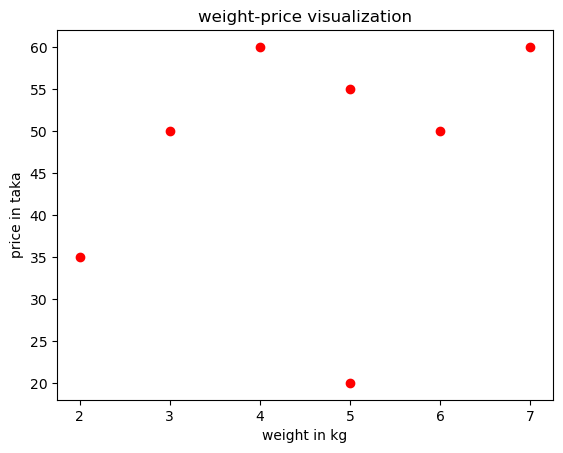

In [31]:
plt.scatter(x,y, color="red")
plt.xlabel("weight in kg")
plt.ylabel("price in taka")
plt.title("weight-price visualization")

In [32]:
df

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = df.drop("price", axis=1)
y = df.drop("weight",axis=1)

In [35]:
y

,price
0,35
1,60
2,20
3,50
4,50
5,55
6,60


In [36]:
x

,weight
0,2
1,4
2,5
3,3
4,6
5,5
6,7


In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=.30)

In [38]:
ytrain.head()

,price
1,60
5,55
3,50
6,60


In [39]:
xtest.head()

,weight
0,2
2,5
4,6


In [40]:
ytest.head()

,price
0,35
2,20
4,50


In [41]:
xtrain.shape

(4, 1)

In [42]:
xtest.shape

(3, 1)

In [43]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [44]:
reg.predict(xtest)

array([[51.14285714],
       [56.71428571],
       [58.57142857]])

In [45]:
ytest.head()

,price
0,35
2,20
4,50


In [46]:
ytest["predicted_y"] = reg.predict(xtest)

In [47]:
ytest.head()

,price,predicted_y
0,35,51.142857
2,20,56.714286
4,50,58.571429


In [48]:
len(ytest)

3

In [49]:
ytest.drop("predicted_y", axis=1, inplace=True)

In [50]:
ytest.head()

,price
0,35
2,20
4,50


In [51]:
reg.score(xtrain,ytrain)

0.43896103896103955

In [52]:
reg.score(xtest,ytest)

-2.737777777777778

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [54]:
mse = mean_squared_error(ytest,reg.predict(xtest))
mse

560.6666666666667

In [55]:
mae=mean_absolute_error(ytest,reg.predict(xtest))

In [56]:
mae

20.476190476190478

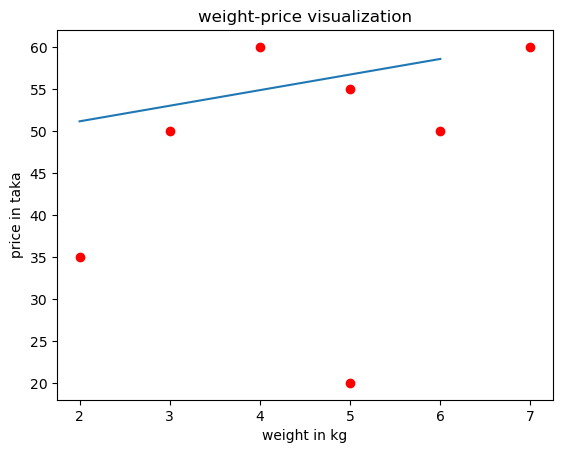

In [57]:
plt.scatter(x,y, color="red")
plt.xlabel("weight in kg")
plt.ylabel("price in taka")
plt.title("weight-price visualization")
plt.plot(xtest,reg.predict(xtest))

In [58]:
import seaborn as sns

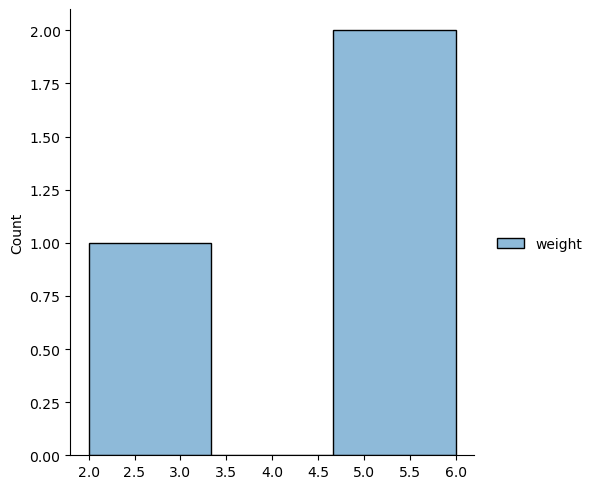

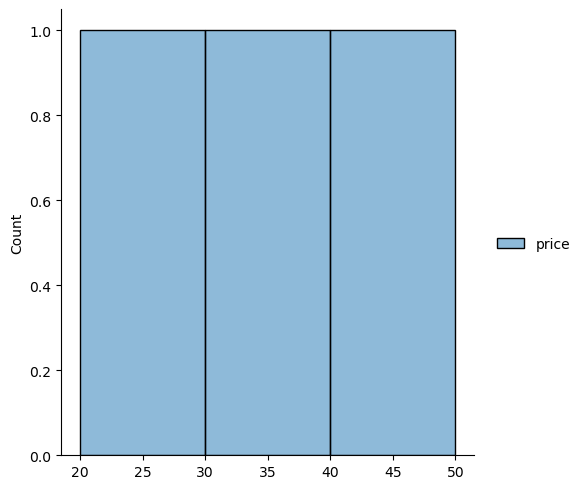

In [78]:
sns.displot((xtest)) and sns.displot(ytest)

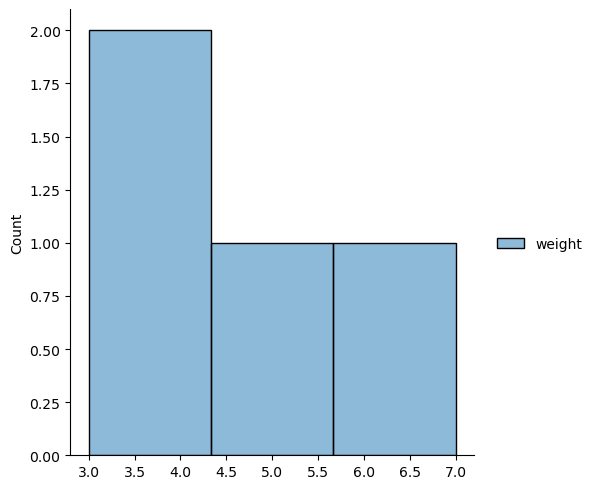

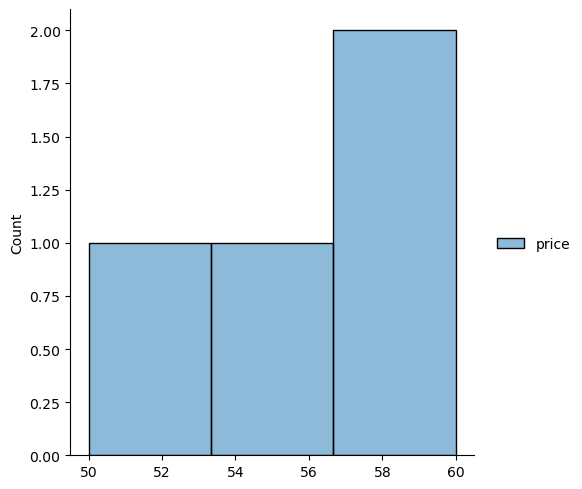

In [77]:
sns.displot(xtrain ) and sns.displot(ytrain)